In [62]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy.polynomial import chebyshev
from cycler import cycler

from pdswe import PDSWE



import os, sys
folder_to_add = os.path.abspath(os.path.join('..', 'classical_wall'))
if folder_to_add not in sys.path:
    sys.path.insert(0, folder_to_add)


from pcswe_wall import PCSWE_wall

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:

factor = 0.9
h_fx = lambda x: factor*x
h_fx_dx = lambda x: factor
h_fx_dxx = lambda x: 0


pdswe = PDSWE()
pdswe.H = 7.12
pdswe.A = 0.72
pdswe.L = 8e3
pdswe.r = 0.45
pdswe.tol = 1e-7

pdswe.a_r = 0.1
pdswe.dL = 0

pdswe.h_fx = h_fx
pdswe.h_fx_dx = h_fx_dx
pdswe.h_fx_dxx = h_fx_dxx


pdswe.set_derivative_vars()
pdswe.solve()




   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.27e-07       9.97e-28         1000            126      
       2          9.80e-08       1.78e-29         1126             0       
Solved in 2 iterations, number of nodes 1126. 
Maximum relative residual: 9.80e-08 
Maximum boundary residual: 1.78e-29


In [64]:

# pcswe = PCSWE_wall()
# pcswe.H = 7.12
# pcswe.A = 0.72
# pcswe.L = 8e3
# pcswe.r = 0.45
# pcswe.tol = 1e-7

# pcswe.h_fx = h_fx
# pcswe.h_fx_dx = h_fx_dx
# pcswe.h_fx_dxx = h_fx_dxx


# pcswe.set_derivative_vars()
# pcswe.solve()


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.79e-02       1.06e-28         1000            321      
       2          3.01e-03       3.04e-31         1321            537      
       3          2.20e-04       1.39e-27         1858            711      
       4          6.92e-06       2.69e-25         2569            738      
       5          3.07e-06       1.78e-28         3307            258      
       6          2.18e-07       1.51e-32         3565             7       
       7          1.00e-07       3.89e-32         3572             0       
Solved in 7 iterations, number of nodes 3572. 
Maximum relative residual: 1.00e-07 
Maximum boundary residual: 3.89e-32
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.88e-02       7.24e-30         1000            324      
       2          2.97e-03       3.20e-32         1324            540      
       3          7.11e-05       2.88e-27   

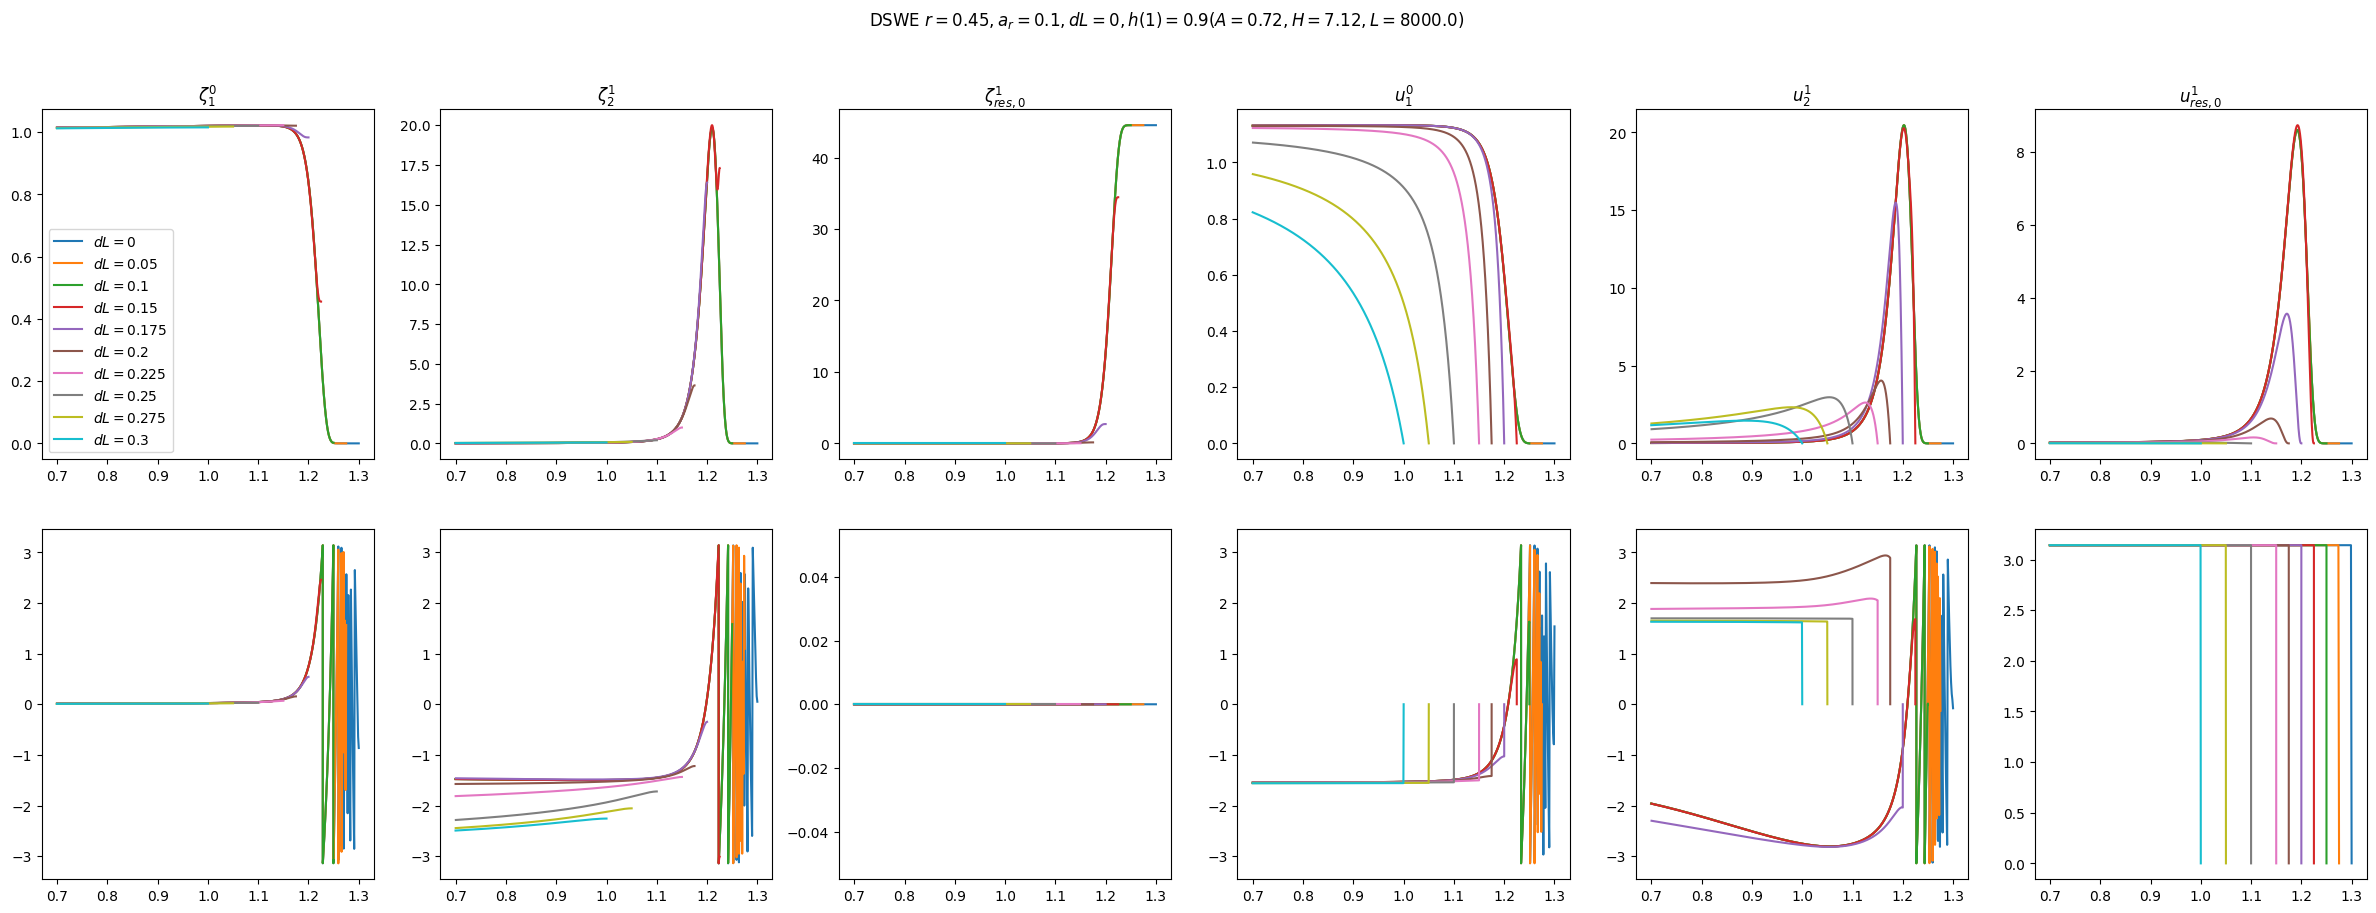

In [67]:
fig, axs = plt.subplots(2, 6, figsize=(30, 10))

bnd = 0.7


pdswe.r = 0.45

dLs = [0, 0.05, 0.1,0.15, 0.175, 0.2, 0.225,0.25,0.275, 0.3]
# ars = [0.1, 0.01, 0.001, 0.0001]
for dL in dLs[::-1]:
    pdswe.dL = dL
    pdswe.set_derivative_vars()
    pdswe.solve()
    
    # pdswe.visualize_components(bnd, axs=axs)
    pdswe.visualize_amplitudes(bnd, axs=axs)
    # pdswe.visualize_defina_vars(0.7, axs=axs2)



axs[0, 0].legend([r"$dL = {}$".format(ar) for ar in dLs])



fig.suptitle(pdswe.signature())

plt.show()

# pdswe.visualize_components(0.9)
# pdswe.visualize_amplitudes(0)